# Variability amplitude vs. kinematic age.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import kinematics_and_rotation as kr
from kinematics_and_rotation.dispersion import select_stars, MC_dispersion, err_on_sample_std_dev

plotpar = {'axes.labelsize': 30,
           'font.size': 30,
           'legend.fontsize': 15,
           'xtick.labelsize': 30,
           'ytick.labelsize': 30,
           'text.usetex': True}
plt.rcParams.update(plotpar)

In [2]:
df = pd.read_csv("../data/gaia_mc_non_periodic_rvar_append.csv")
m = df.Rvar.values > 0
gaia_mc = df.iloc[m]
print(np.shape(gaia_mc))

(2600, 142)


In [3]:
x = gaia_mc.color_teffs.values
v = gaia_mc.vb.values
verr = gaia_mc.vb_err.values
xerr = np.ones_like(x)*100
xlim = (max(x) + 100, min(x) - 200)

tbins = np.linspace(min(x), max(x), 5)

In [4]:
y = gaia_mc.Rvar.values

period_bins = 10**np.linspace(2, 3.5, 7)
mid_period_bins = period_bins[:-1] + .5*np.diff(period_bins)
period_masks = select_stars(gaia_mc, period_bins, "Rvar")

pds, pderrs = [np.zeros((len(period_bins), len(tbins[:-1]))) for i in range(2)]

/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


[ 100.          177.827941    316.22776602  562.34132519 1000.
 1778.27941004 3162.27766017]


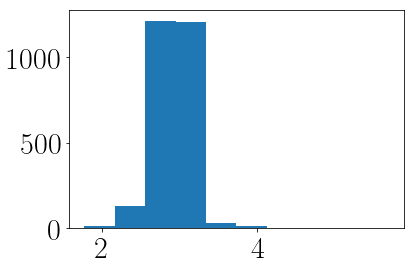

In [5]:
plt.hist(np.log10(gaia_mc.Rvar));
print(period_bins)

In [6]:
for i, m in enumerate(period_masks):
    d, derr, k, kerr = MC_dispersion(x[m], v[m], xerr[m], verr[m], tbins, 1000, method="std")
    derr = err_on_sample_std_dev(d, len(x[m]))
    pds[i, :] = d
    pderrs[i, :] = err_on_sample_std_dev(d, len(x[m]))

    midbin = np.diff(tbins)*.5+tbins[:-1]

  0%|          | 0/1000 [00:00<?, ?it/s]/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 1000/1000 [00:00<00:00, 1914.98it/s]


In [7]:
cmap = plt.cm.get_cmap('plasma_r')
pvmin, pvmax = np.min(pds[pds > 0]), np.max(pds[np.isfinite(pds)])
pcolor_values = (pds - pvmin)/(pvmax - pvmin)
prgba_plasma = cmap(pcolor_values)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Text(0.5, 0, '$\\mathrm{T_{eff}~[K]}$')

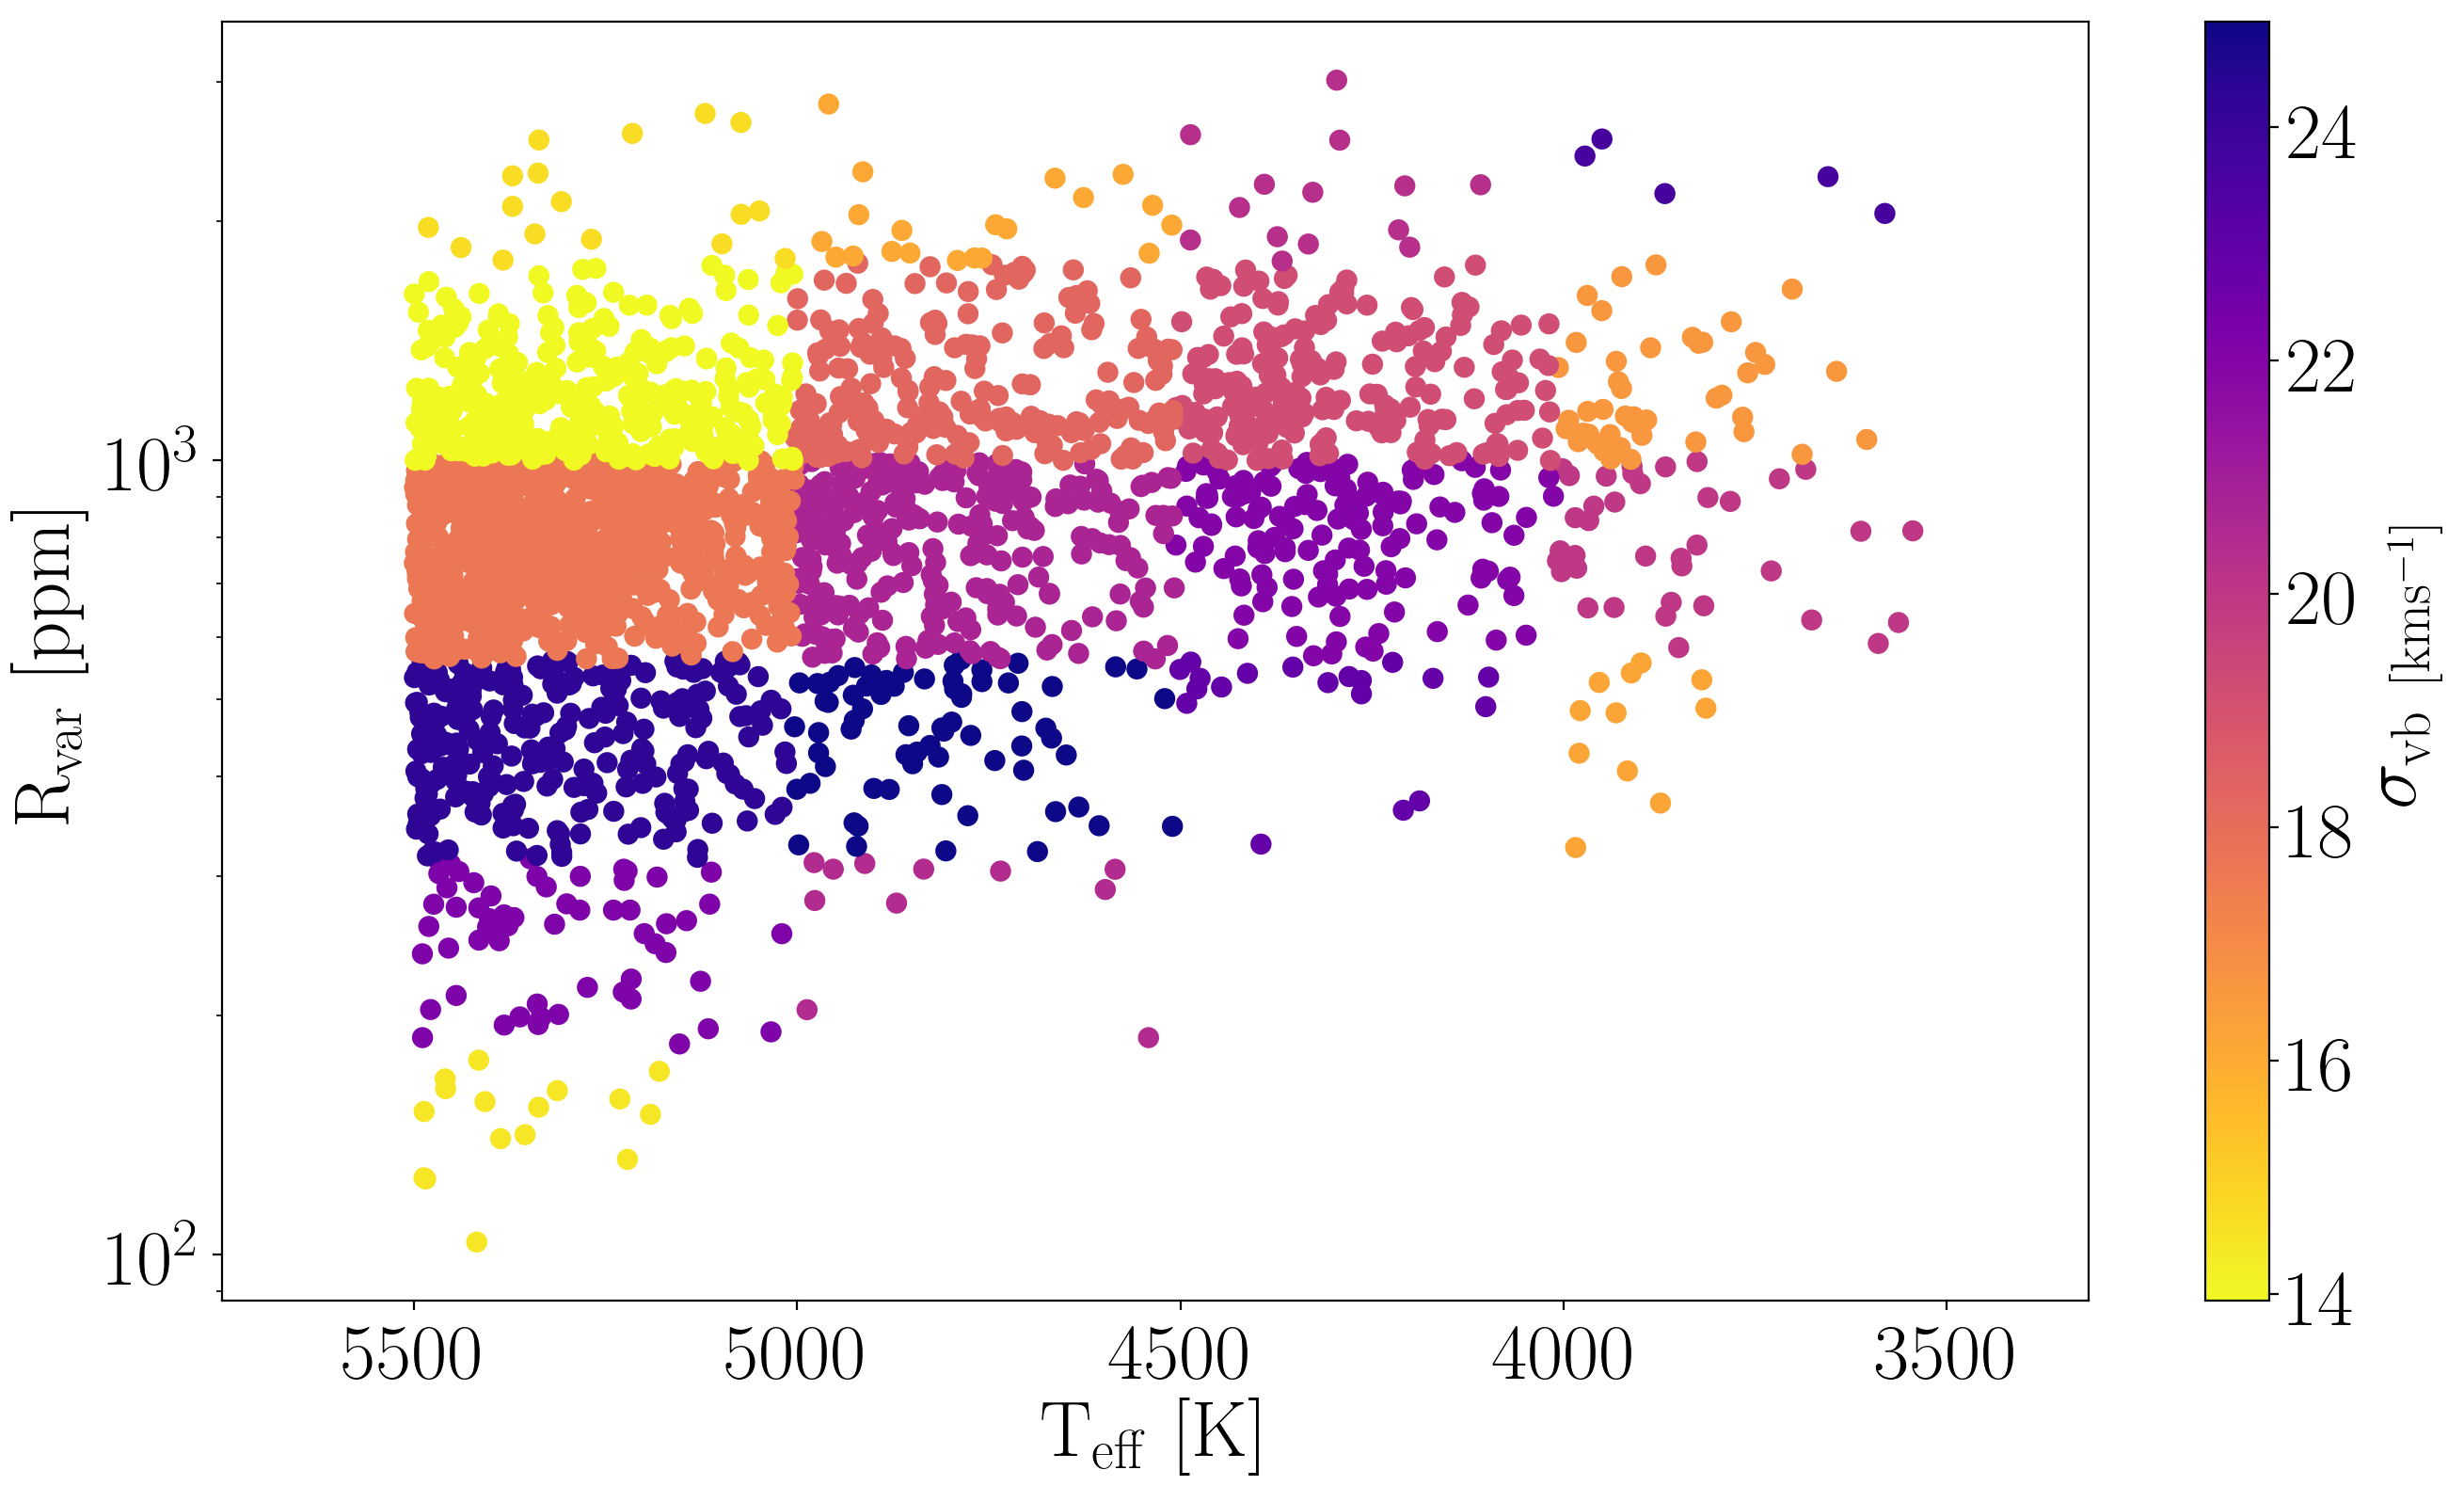

In [8]:
fig = plt.figure(figsize=(16, 9), dpi=200)
ax = fig.add_subplot(111)

# plt.plot(gaia_mc1.color_teffs.values, gaia_mc1.Rvar.values, ".", color=".7", zorder=0)

for i, m in enumerate(period_masks):
    
    for j in range(len(tbins)-1):
        tm = (x[m] > tbins[j]) * (x[m] < tbins[j+1])
        cb1 = plt.scatter(x[m][tm], y[m][tm], c=np.ones_like(y[m][tm])*pds[i, j],
                          vmin=pvmin, vmax=pvmax, rasterized=True, zorder=1, s=50,
                          cmap="plasma_r")


plt.colorbar(cb1, label="$\sigma_\mathrm{vb~[kms^{-1}]}$")
ax.set_ylabel("$\mathrm{R_{var}~[ppm]}$")
# ax.set_ylim(10**4.5, 10**3.1)
ax.set_xlim(5750, xlim[1])
ax.set_yscale("log")
ax.set_xlabel("$\mathrm{T_{eff}~[K]}$")

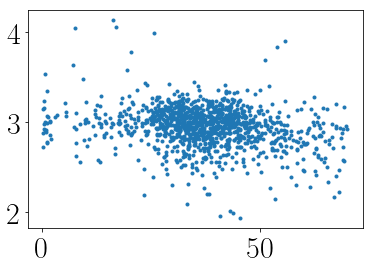

In [9]:
plt.plot(gaia_mc.Prot, np.log10(gaia_mc.Rvar), ".")

Now combine both.

In [10]:
gaia_mc_per = pd.read_csv("../data/gaia_mc_cuts.csv")
gaia_mc_per["Rvar"] = gaia_mc_per.Rper.values
df = pd.concat([gaia_mc_per, gaia_mc])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
x = df.color_teffs.values
v = df.vb.values
verr = df.vb_err.values
xerr = np.ones_like(x)*100
xlim = (max(x) + 100, min(x) - 200)

tbins = np.linspace(min(x), max(x), 11)

y = df.Rvar.values

period_bins = 10**np.linspace(2, 4.4, 13)
mid_period_bins = period_bins[:-1] + .5*np.diff(period_bins)
period_masks = select_stars(df, period_bins, "Rvar")

pds, pderrs = [np.zeros((len(period_bins), len(tbins[:-1]))) for i in range(2)]

for i, m in enumerate(period_masks):
    d, derr, k, kerr = MC_dispersion(x[m], v[m], xerr[m], verr[m], tbins, 1000, method="std")
    derr = err_on_sample_std_dev(d, len(x[m]))
    pds[i, :] = d
    pderrs[i, :] = err_on_sample_std_dev(d, len(x[m]))

    midbin = np.diff(tbins)*.5+tbins[:-1]

/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
  0%|          | 0/1000 [00:00<?, ?it/s]/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 1000/1000 [00:01<00:00, 684.21it/s]


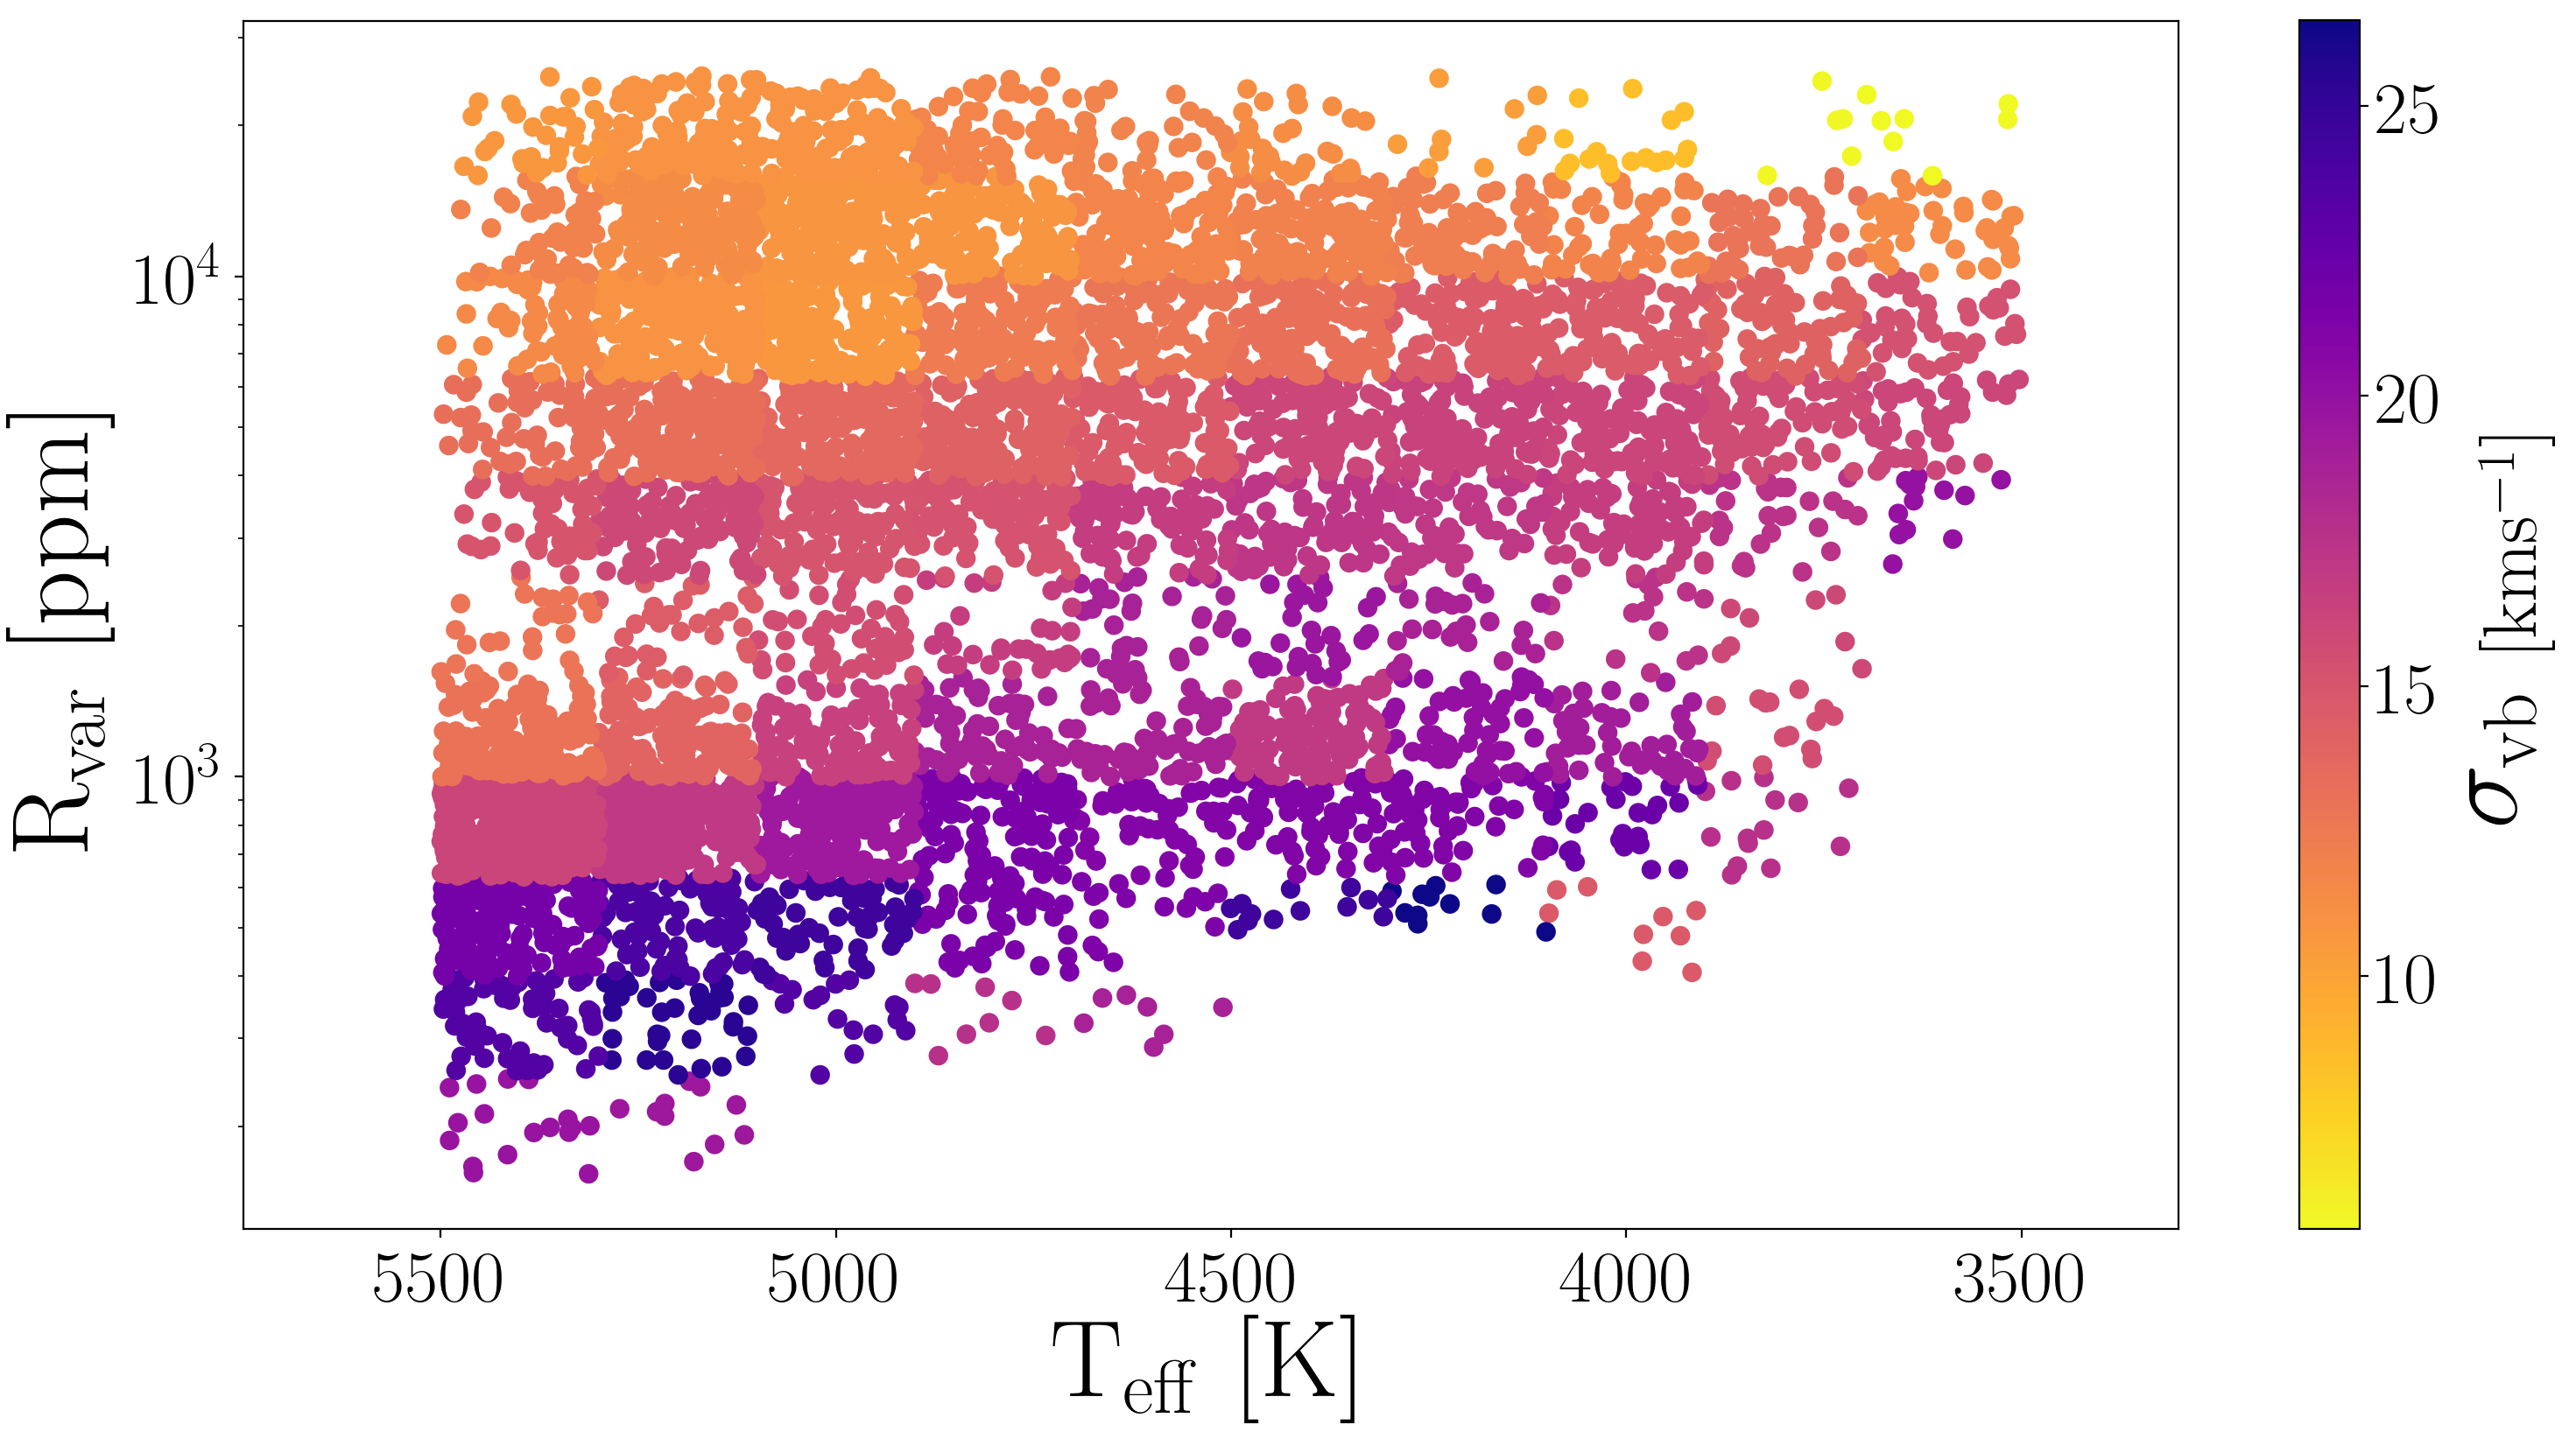

In [36]:
plotpar = {'axes.labelsize': 45,
           'legend.fontsize': 45,
           'text.usetex': True}
plt.rcParams.update(plotpar)

cmap = plt.cm.get_cmap('plasma_r')
pvmin, pvmax = np.min(pds[pds > 0]), np.max(pds[np.isfinite(pds)])
pcolor_values = (pds - pvmin)/(pvmax - pvmin)
prgba_plasma = cmap(pcolor_values)

fig = plt.figure(figsize=(16, 9), dpi=200)
ax = fig.add_subplot(111)

for i, m in enumerate(period_masks):
    
    for j in range(len(tbins)-1):
        tm = (x[m] > tbins[j]) * (x[m] < tbins[j+1])
        cb1 = plt.scatter(x[m][tm], y[m][tm], c=np.ones_like(y[m][tm])*pds[i, j],
                          vmin=pvmin, vmax=pvmax, rasterized=True, zorder=1, s=50,
                          cmap="plasma_r")


plt.colorbar(cb1, label="$\sigma_\mathrm{vb~[kms^{-1}]}$")
ax.set_ylabel("$\mathrm{R_{var}~[ppm]}$")
# ax.set_ylim(10**4.5, 10**3.1)
ax.set_xlim(5750, xlim[1])
ax.set_yscale("log")
ax.set_xlabel("$\mathrm{T_{eff}~[K]}$")
plt.savefig("amped.pdf")
plt.savefig("amped")
plt.tight_layout()

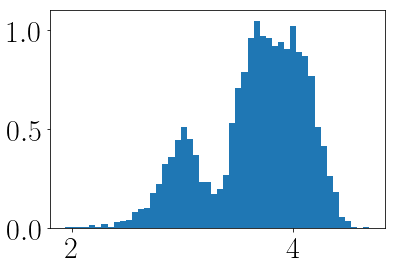

In [17]:
m = np.isfinite(df.Prot.values)
plt.hist(np.log10(df.iloc[m].Rvar), 50, density=True);

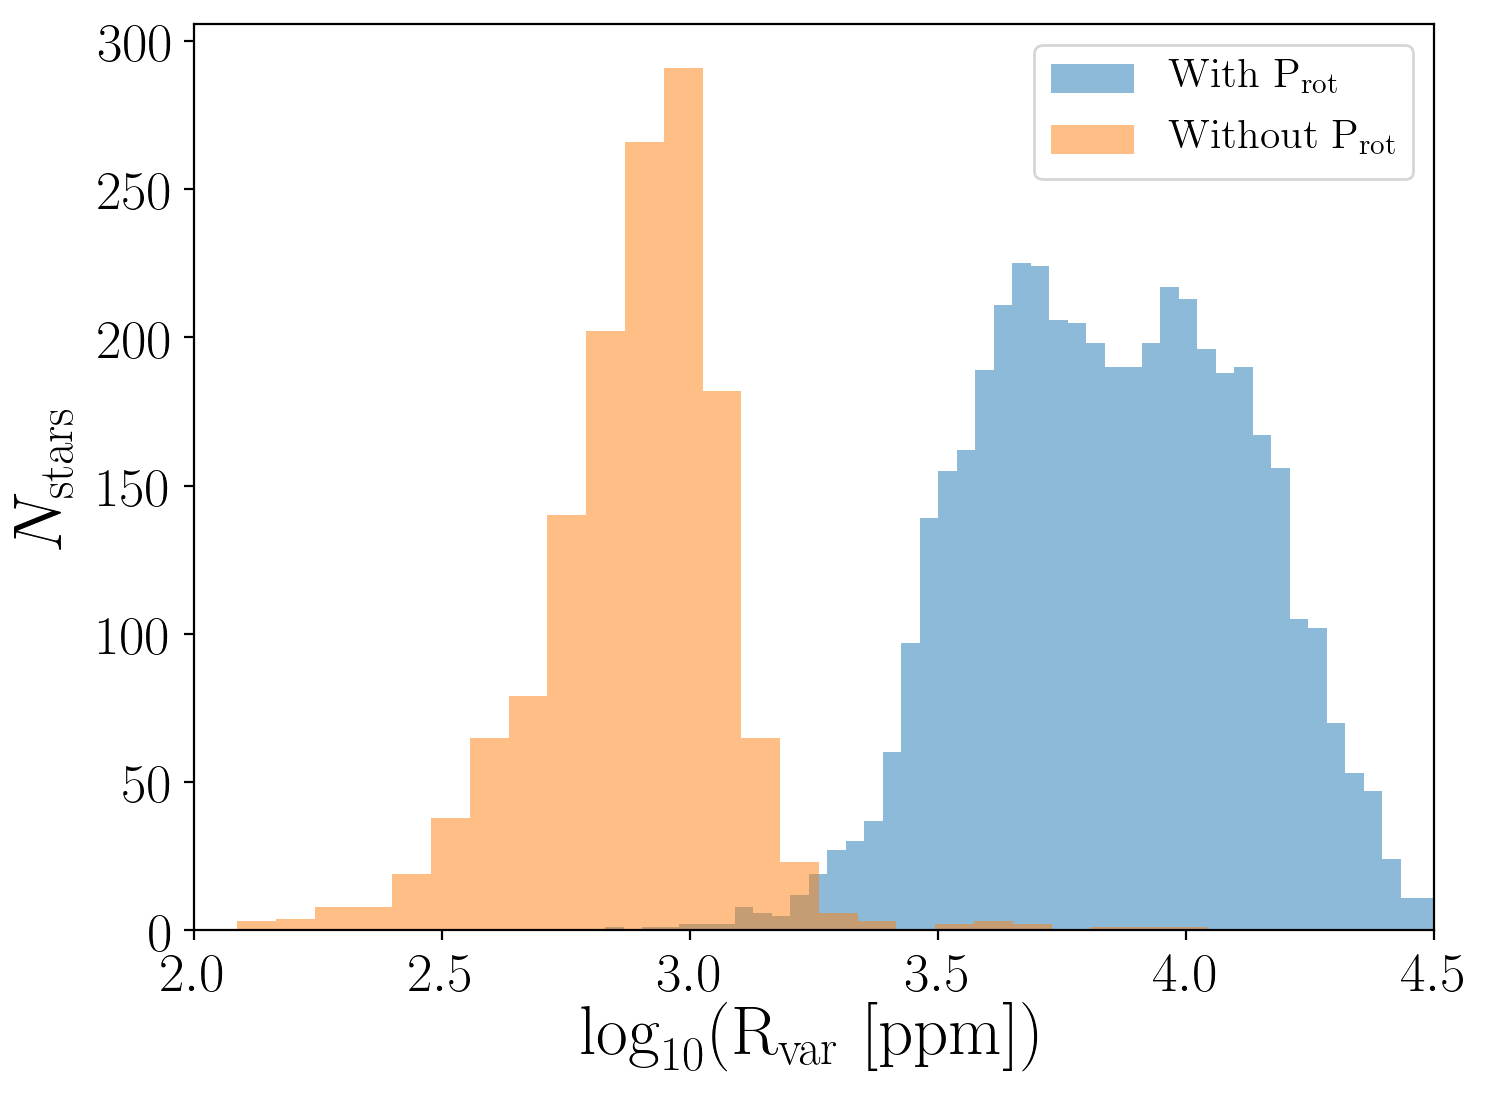

In [33]:
mc = pd.read_csv("../data/gaia_mc_cuts.csv")

plt.figure(figsize=(8, 6), dpi=200)
plt.hist(np.log10(mc.Rper), 50, density=False, alpha=.5, label="$\mathrm{With~P_{rot}}$");
plt.hist(np.log10(df.iloc[~m].Rvar), 50, density=False, alpha=.5, label="$\mathrm{Without~P_{rot}}$");
plt.xlabel("$\log_{10}(\mathrm{R_{var}}~[\mathrm{ppm}])$")
plt.ylabel("$N_\mathrm{stars}$")
plt.legend()
plt.xlim(2, 4.5)
plt.savefig("amp_hist")
plt.savefig("amp_hist.pdf")

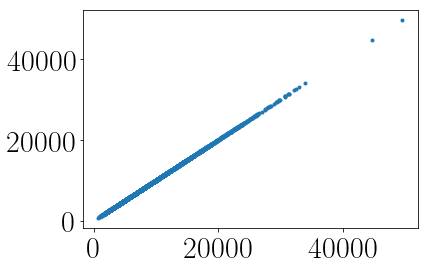